# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
from pprint import pprint
from api_keys import weather_api_key
import citipy as citipy
import numpy as np
import time
import scipy.stats as st
from scipy.stats import linregress

from citipy import citipy
import datetime
import seaborn as sns

api_key = weather_api_key


lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [7]:
# List to hold cities
lat_long = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lats, lngs)

# Identify nearest city for each latitude and longitude combination
for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If city is not in list add to cities list
    if city not in cities:
        cities.append(city)

# Print the city count 
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# create the list to hold city information
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat_list = []
long_list = []
max_temp = []
wind_speed = []
index_count = 0
set_count = 1

In [10]:

# Create the URL for api calls

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For city name in cities 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        long_list.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_count > 100:
            index_count = 0
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
        print(f"Processing Record {index_count} of Set {set_count} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")



Processing Record 1 of Set 1 : kieta
Processing Record 2 of Set 1 : komsomolskiy
Processing Record 3 of Set 1 : ushuaia
Processing Record 4 of Set 1 : cape town
Processing Record 5 of Set 1 : touros
Processing Record 6 of Set 1 : arraial do cabo
Processing Record 7 of Set 1 : albany
Processing Record 8 of Set 1 : punta arenas
Processing Record 9 of Set 1 : mar del plata
Processing Record 10 of Set 1 : guerrero negro
Processing Record 11 of Set 1 : carnarvon
Processing Record 12 of Set 1 : barrow
Processing Record 13 of Set 1 : yaya
Processing Record 14 of Set 1 : luderitz
Processing Record 15 of Set 1 : sioux lookout
Processing Record 16 of Set 1 : whitianga
Processing Record 17 of Set 1 : cockburn town
Processing Record 18 of Set 1 : ilulissat
Processing Record 19 of Set 1 : novaya ladoga
City not found. Skipping...
Processing Record 20 of Set 1 : dikson
Processing Record 21 of Set 1 : paita
Processing Record 22 of Set 1 : gien
Processing Record 23 of Set 1 : plettenberg bay
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# New Weather DataFrame from Raw Data

weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat_list,
                "Lng" : long_list,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed})



In [13]:
#Display weather DataFrame
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kieta,90,PG,1601559593,81,-6.22,155.63,77.65,1.01
1,Yangi Marg`ilon,66,UZ,1601559624,55,40.43,71.72,62.60,2.24
2,Ushuaia,75,AR,1601559625,100,-54.80,-68.30,26.60,14.99
3,Cape Town,40,ZA,1601559418,51,-33.93,18.42,62.60,31.09
4,Touros,75,BR,1601559625,83,-5.20,-35.46,77.00,10.29
...,...,...,...,...,...,...,...,...,...
547,Celestún,95,MX,1601559849,88,20.87,-90.40,78.80,14.29
548,Umluj,0,SA,1601559850,56,25.02,37.27,89.58,5.35
549,Cabo Rojo,57,PR,1601559850,68,18.09,-67.15,89.01,1.99
550,São Raimundo Nonato,1,BR,1601559850,30,-9.02,-42.70,91.67,11.61


In [14]:
# Export the dataframe into a csv


weather_df.to_csv("cities.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] > 100]


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

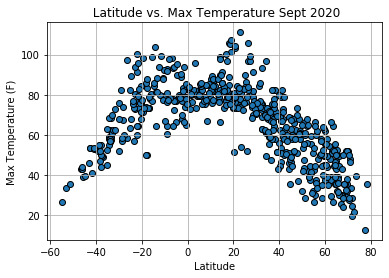

In [16]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
ax.set_title(' Latitude vs. Max Temperature Sept 2020')
ax.scatter(weather_df['Lat'],weather_df['Max Temp'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_max_temp.png')

## Latitude vs. Humidity Plot

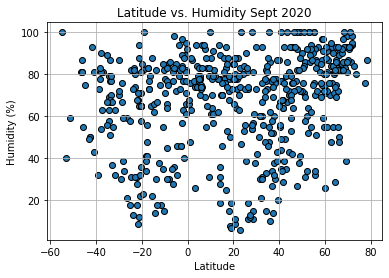

In [17]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
ax.set_title('Latitude vs. Humidity Sept 2020')
ax.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_humidity.png')

## Latitude vs. Cloudiness Plot

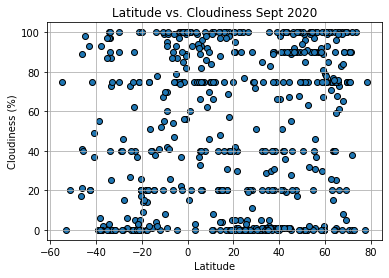

In [18]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
ax.set_title('Latitude vs. Cloudiness Sept 2020')
ax.scatter(weather_df['Lat'],weather_df['Cloudiness'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_cloudiness.png')

## Latitude vs. Wind Speed Plot

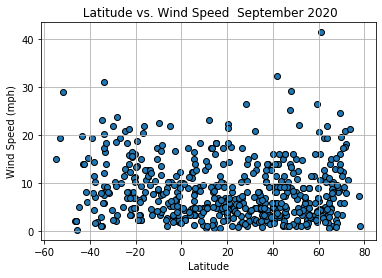

In [19]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
ax.set_title(' Latitude vs. Wind Speed  September 2020')
ax.scatter(weather_df['Lat'],weather_df['Wind Speed'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_wind_speed.png')

## Linear Regression

In [35]:
# Northern and Southern Hemisphere 
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [36]:
# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a function for line
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.83


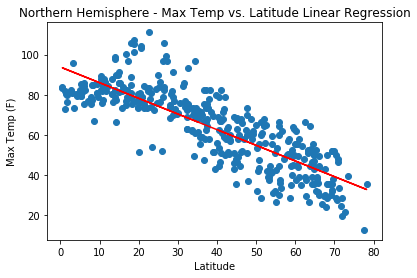

In [37]:
# 1st function
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# 2nd function
annotate(equation, 0, 0)

# Title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

#  ylabel
plt.ylabel("Max Temp (F)")
fig.savefig('Northern Hemisphere Temp vs Lat Linear Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.72


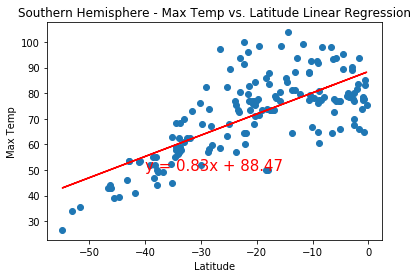

In [38]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])


annotate(equation, -40, 50)

# title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

#  ylabel
plt.ylabel("Max Temp")
fig.savefig('Southern Hemisphere Temp vs Lat Linear Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.21


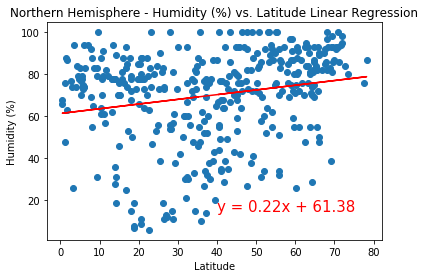

In [39]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])


annotate(equation, 40, 15)

#  title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

#  ylabel
plt.ylabel("Humidity (%)")
fig.savefig('Northern Hemisphere Humidity vs Lat Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.21


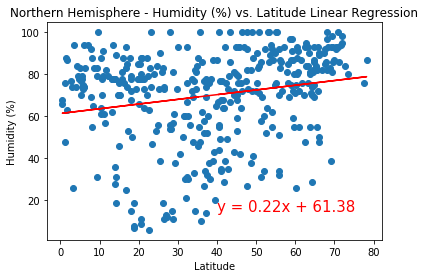

In [40]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])


annotate(equation, 40, 15)

#  title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

#  ylabel
plt.ylabel("Humidity (%)")
fig.savefig('Southern Hemisphere Humidity vs Lat Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.13


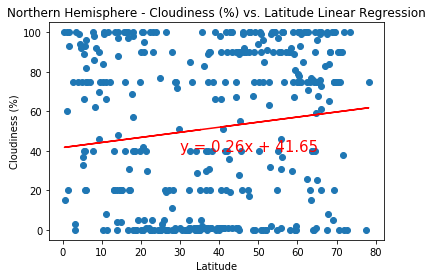

In [41]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])


annotate(equation, 30, 40)

# title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

#  ylabel
plt.ylabel("Cloudiness (%)")
fig.savefig('Northern Hemisphere Cloudiness vs Lat Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.3


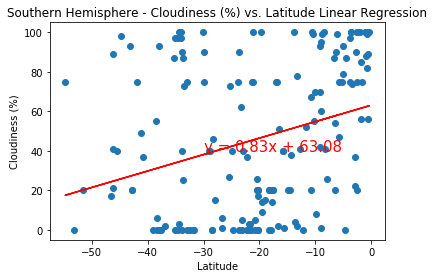

In [42]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])


annotate(equation, -30, 40)

# title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#  xlabel
plt.xlabel("Latitude")

#  ylabel
plt.ylabel("Cloudiness (%)")
fig.savefig('Southern Hemisphere Cloudiness vs Lat Linear Regression.png')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.07


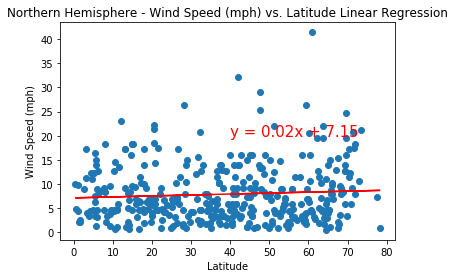

In [43]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])


annotate(equation, 40, 20)

# title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

#  ylabel
plt.ylabel("Wind Speed (mph)")
fig.savefig('Northern Hemisphere Wind Speed vs Lat Linear Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.2


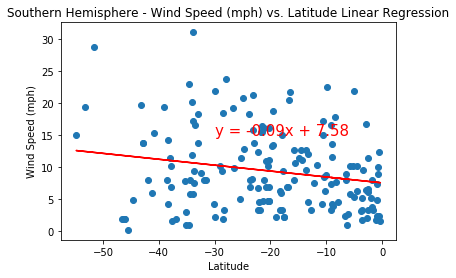

In [44]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])


annotate(equation, -30, 15)

#  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

#  ylabel
plt.ylabel("Wind Speed (mph)")
fig.savefig('Southern Hemisphere Wind Speed vs Lat Linear Regression.png')